# Homework 1 (Dev Mody)
## Exercise 5

In high dimensions random search is no longer efficient. We therefore want to look at coordinate search and coordinate descent. For coordinate search, instead of generating $P$ (or num samples) random directions we only look for descent among the $2N$ coordinate directions. That means that the candidate directions to go to are always the same and can be fixed at the start (have a look at `np.eye`). For instance like this:

```python
# construct set of all coordinate directions
directions_plus = np.eye(np.size(w),np.size(w))
directions_minus = - np.eye(np.size(w),np.size(w))
directions = np.concatenate((directions_plus,directions_minus),axis=0)
```

For coordinate search we go through all of these directions at every step and select the best one. In contrast, for coordinate descent we instead randomly go through the coordinate directions and the first time we find a descent we use it.

### 5.1: Implementing Coordinate Search & Descent

Modify your implementation of `random_search` to implement `coordinate_search` and `coordinate_descent`. In both cases, you must use normalized directions (multiplied by the steplength). Make sure you can go both in the postive and negative direction for each coordinate. In one dimension there would be two directions, forward and backward. In two dimensions there would be 4 directions: North, South, East and West. 

HINT: For coordinate descent have a look at `numpy.random.permutation`
WATCH OUT FOR: For a fair comparison between the 2 algorithms you should allow `coordinate_descent` to attempt to take $N$ steps whenever `coordinate_search` takes one step. One way to do that is to generate a random permutation of the $2N$ directions and let coordinate descent run through them sequentially before generating another permutation, letting `max_its` count the number of permutations generated. So, if `max_its` is the maximum number of steps that coordinate search can take then coordinate descent could possibly take $N \times$ `max_its` steps. Read section 2.6.2 in the text book.

ANSWER: The implementation of `coordinate_search` and `coordinate_descent` is as follows:

In [3]:
import numpy as np

def coordinate_search (g, alpha_choice, max_its, w):
    w_history = []
    cost_history = []
    alpha = 0
    N = len(w)
    
    directions_plus = np.eye(N)
    directions_minus = -np.eye(N)
    directions = np.concatenate((directions_plus, directions_minus), axis=0)
    
    norms = np.linalg.norm(directions, axis=1)
    directions = directions / norms[:, np.newaxis]
    
    for k in range(1, max_its + 1):
        if alpha_choice == 'diminishing':
            alpha = 1 / float(k)
        else:
            alpha = alpha_choice
            
        w_history.append(w)
        cost_history.append(g(w))
        w_candidates = np.array([g(w + alpha * v) for v in directions])
        best = np.argmin(w_candidates)
        w = w + alpha * directions[best]
    
    w_history.append(w)
    cost_history.append(g(w))
    
    return w_history, cost_history

def coordinate_descent (g, alpha_choice, max_its, w):
    w_history = []
    cost_history = []
    alpha = 0
    N = len(w)
    
    directions_plus = np.eye(N)
    directions_minus = -np.eye(N)
    directions = np.concatenate((directions_plus, directions_minus), axis=0)
    
    norms = np.linalg.norm(directions, axis=1)
    directions = directions / norms[:, np.newaxis]
    
    for k in range(1, max_its + 1):
        if alpha_choice == 'diminishing':
            alpha = 1 / float(k)
        else:
            alpha = alpha_choice
        
        permuted_directions = directions[np.random.permutation(2 * N)]
        
        for v in permuted_directions:
            candidate_w = w + alpha * v
            if g(candidate_w) < g(w):
                w = candidate_w
                break
            
        w_history.append(w)
        cost_history.append(g(w))
    
    return w_history, cost_history


### 5.2: Testing it out

Consider the function $g(w_1, w_2) = 0.26(w_1^2 + w_2^2) - 0.48w_1w_2$. Starting with $w^0 = (3, 4)$, using the maximum number of iterations $P = 40$ and a diminishing steplength, compare coordinate search with coordiate descent by plotting the cost history.

ANSWER: The comparison is as follows.

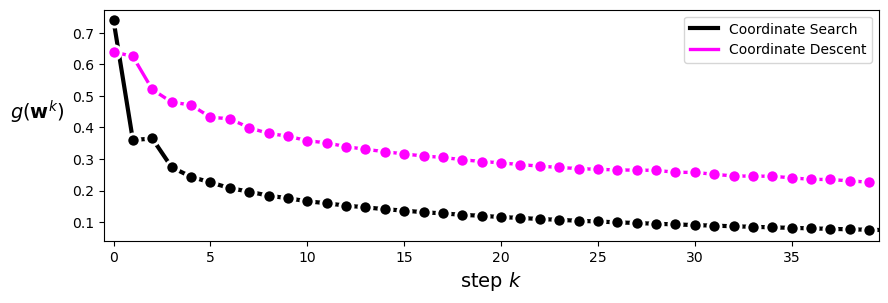

In [4]:
import sys
sys.path.append('homeworks/homework1/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

static_plotter = static_plotter.Visualizer()

g = lambda w: 0.26 * ((w[0]**2) + (w[1]**2)) - (0.48 * w[0] * w[1])
w = ([3, 4])
max_its = 40

_, cost_history_search = coordinate_search(g, "diminishing", max_its, w)
_, cost_history_descent = coordinate_descent(g, "diminishing", max_its, w)

static_plotter.plot_cost_histories([cost_history_search, cost_history_descent], start=0, points=True, labels=[r'Coordinate Search', r'Coordinate Descent'])

The experiment compares the performance of **Coordinate Search** and **Coordinate Descent** on the function $g(w_1, w_2) = 0.26(w_1^2 + w_2^2) - 0.48w_1w_2$, starting from the initial point $w^0 = (3, 4)$ with a diminishing step length and a maximum of 40 iterations. The results, as depicted in the cost history plot, show that both methods effectively reduce the cost function over iterations, but with distinct behaviors. 

**Coordinate Search** systematically evaluates all $2N$ coordinate directions at each step, leading to a more consistent and steady decrease in the cost function. In contrast, **Coordinate Descent** randomly permutes the directions and updates the weights as soon as a descent direction is found, which can result in faster initial progress but may exhibit more variability in the cost reduction. 

The diminishing step length ensures that both methods converge, but the plot suggests that **Coordinate Search** may achieve a slightly lower final cost due to its exhaustive exploration of directions at each step. This experiment highlights the trade-off between computational efficiency and solution quality in high-dimensional optimization.